In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

warnings.filterwarnings('ignore')

sb.set_style(style='darkgrid')

In [20]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df.info()

X = df[['petal_width', 'sepal_length']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


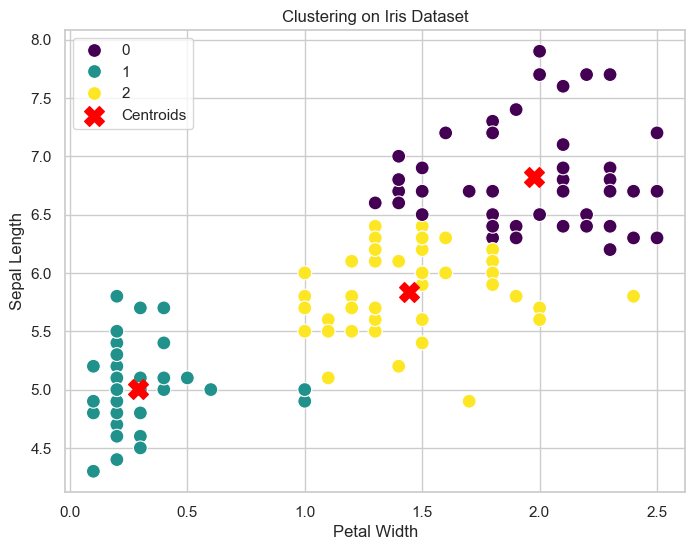

In [22]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


sb.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sb.scatterplot(
    x='petal_width', 
    y='sepal_length', 
    hue='cluster', 
    palette='viridis', 
    data=df, 
    s=100
)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('Clustering on Iris Dataset')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()

